In [4]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from ast import literal_eval

In [7]:
import requests
def fetch_data_from_api(url):
    headers = {'Accept': 'application/json'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data:", response.status_code)
        return None


In [14]:
# Define a function to perform EDA
def perform_eda(json_data):
    # Load the JSON data into a pandas DataFrame
    df = pd.DataFrame(json_data['data']['rows'])

    # Inspect the data
    print(df.head())  # Print the first few rows
    print(df.info())  # Get a concise summary of the DataFrame

    # Clean the data dynamically based on data type inferred from the first row
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            df[column] = pd.to_numeric(df[column], errors='coerce').fillna(0)
        else:
            df[column] = df[column].fillna('Unknown').astype(str)

    # Perform statistical analysis
    print(df.describe(include='all'))  # Get the summary statistics for all columns

    # Visualizations and further analysis would go here
    # ...

    return df  # Return the cleaned DataFrame for further use if needed


In [16]:
df =  fetch_data_from_api("https://api.ossinsight.io/v1/trends/repos/")
df = perform_eda(df)

     repo_id                    repo_name  primary_language  \
0  681372871             microsoft/garnet                C#   
1  773286980               xai-org/grok-1            Python   
2  741790915           OpenInterpreter/01            Python   
3  775250190             stitionai/devika            Python   
4  661954287  mshumer/gpt-prompt-engineer  Jupyter Notebook   

                                         description stars forks  \
0  Garnet is a remote cache-store from Microsoft ...  1613    80   
1                                  Grok open release  1348   263   
2            The open-source language model computer   799    72   
3  Devika is an Agentic AI Software Engineer that...   782   111   
4                                                      669    35   

  pull_requests pushes total_score  \
0             9     21   6210.0914   
1             4          5404.7856   
2            11     25   3651.9766   
3             7      4   3368.1381   
4                    3

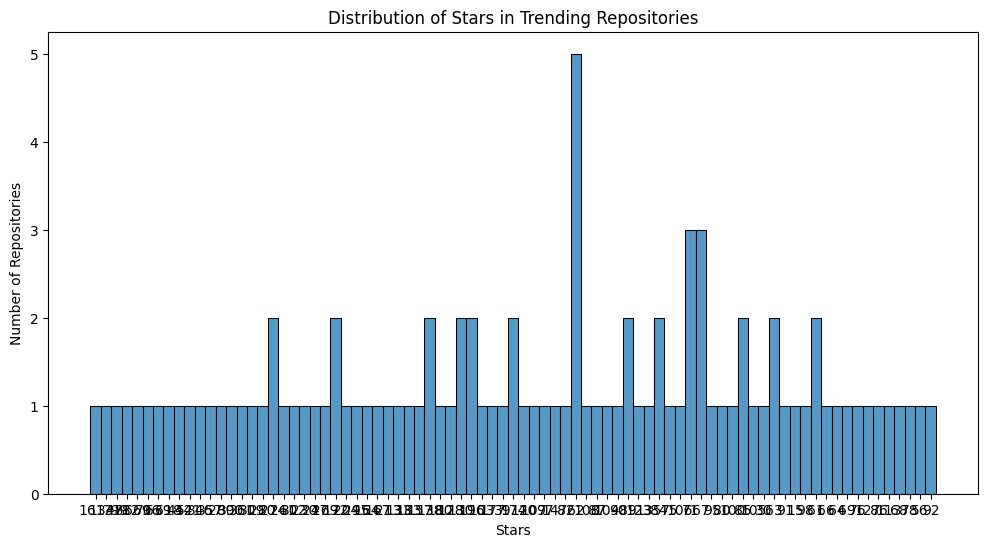

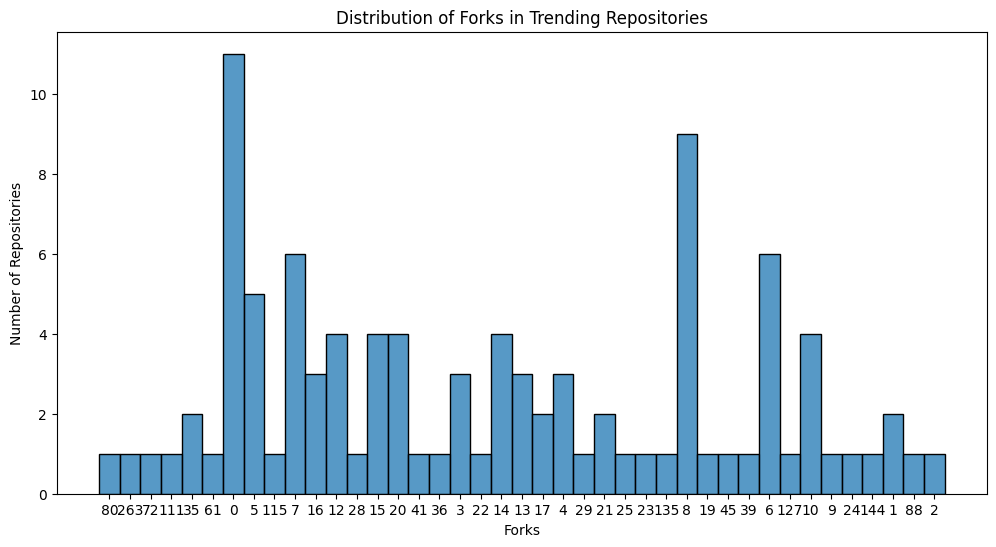

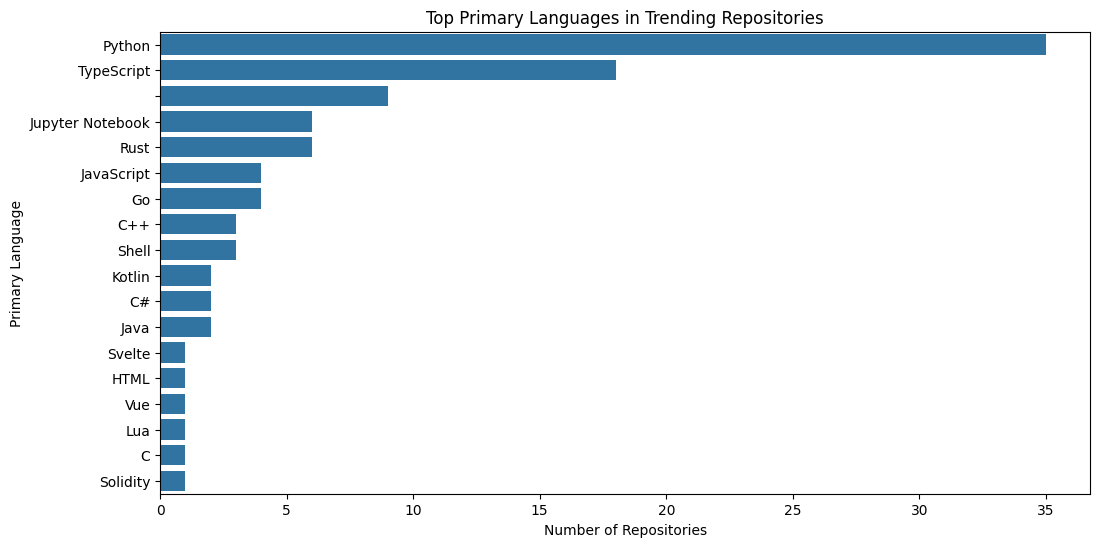

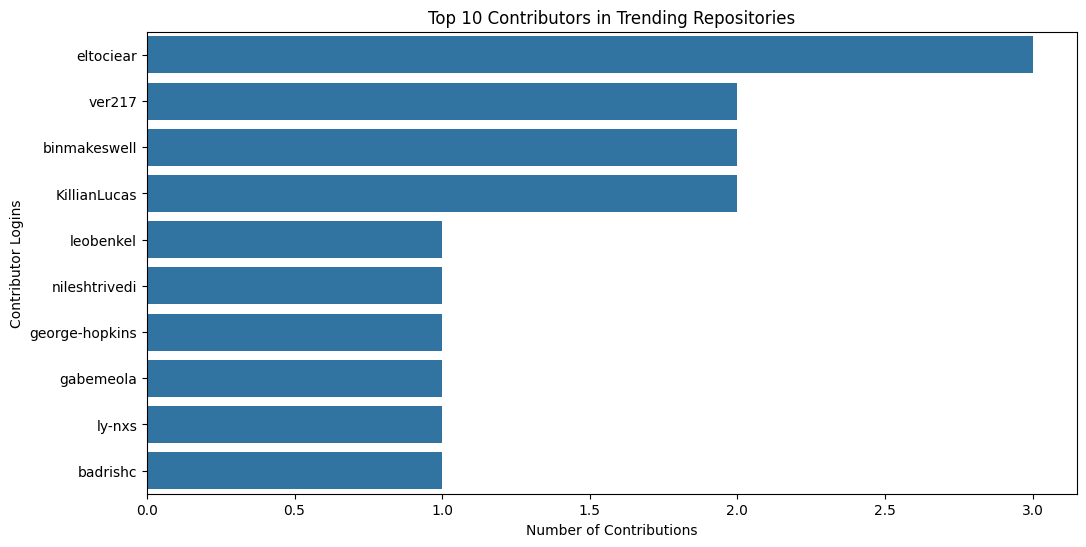

In [20]:
# Trending repos

# Distribution of repository stars
plt.figure(figsize=(12, 6))
sns.histplot(df['stars'], bins=10, kde=False)
plt.title('Distribution of Stars in Trending Repositories')
plt.xlabel('Stars')
plt.ylabel('Number of Repositories')
plt.show()

# Distribution of repository forks
plt.figure(figsize=(12, 6))
sns.histplot(df['forks'], bins=10, kde=False)
plt.title('Distribution of Forks in Trending Repositories')
plt.xlabel('Forks')
plt.ylabel('Number of Repositories')
plt.show()

# Top Primary Languages Used
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='primary_language', order=df['primary_language'].value_counts().index)
plt.title('Top Primary Languages in Trending Repositories')
plt.xlabel('Number of Repositories')
plt.ylabel('Primary Language')
plt.show()

# Top contributors
top_contributors = df.explode('contributor_logins')['contributor_logins'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_contributors.values, y=top_contributors.index)
plt.title('Top 10 Contributors in Trending Repositories')
plt.xlabel('Number of Contributions')
plt.ylabel('Contributor Logins')
plt.show()


In [22]:
# Collections
df =  fetch_data_from_api("https://api.ossinsight.io/v1/collections/")
df = perform_eda(df)

      id                          name
0      1         Static Site Generator
1      2          Open Source Database
2  10001                 CSS Framework
3  10002  Google Analytics Alternative
4  10003     Low Code Development Tool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      90 non-null     object
 1   name    90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB
None
        id                   name
count   90                     90
unique  90                     90
top      1  Static Site Generator
freq     1                      1


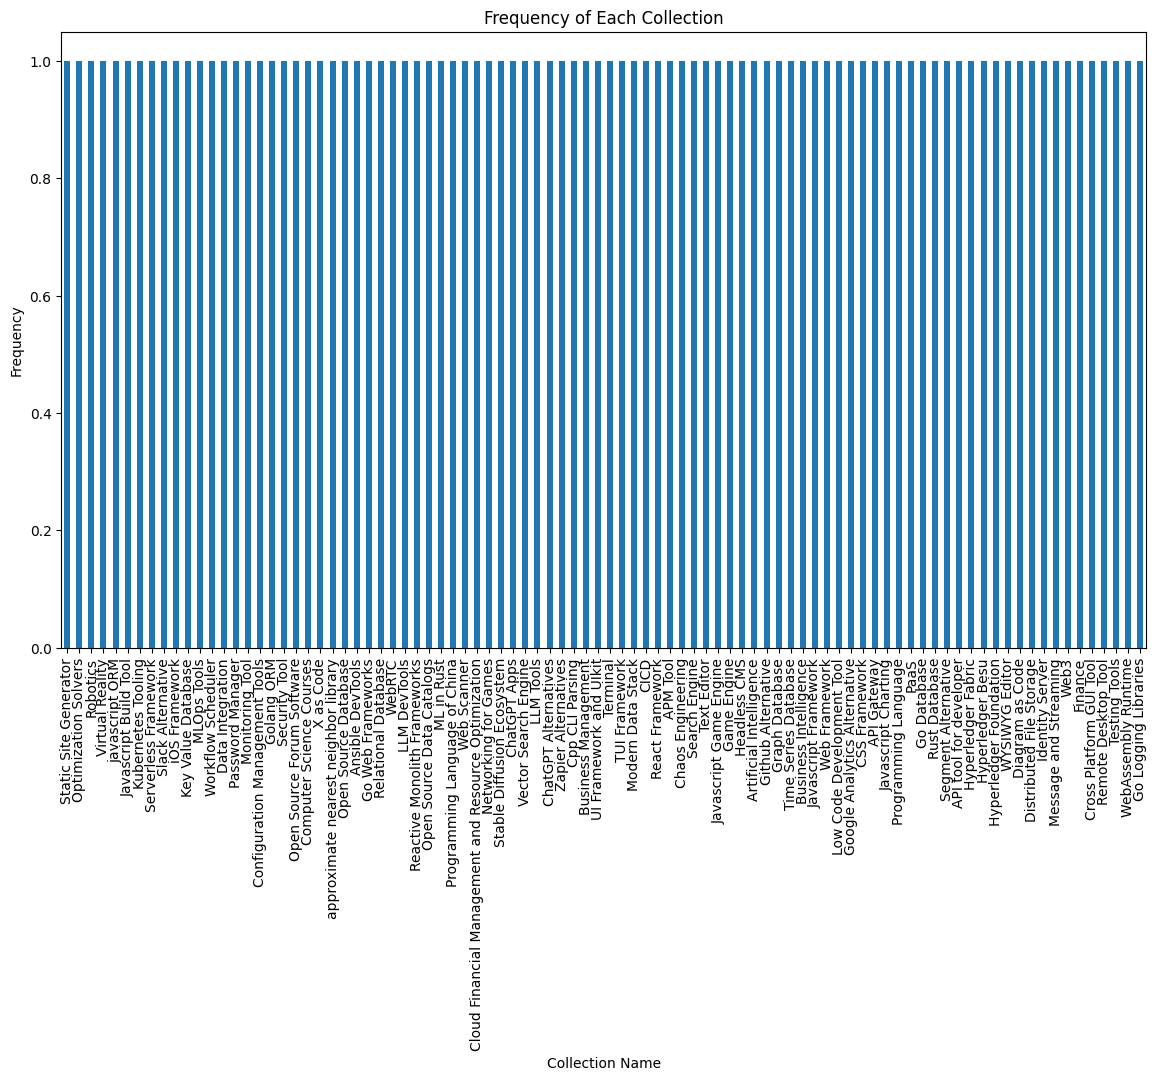

In [24]:
# Step 5: Perform statistical analysis
# For this dataset, since it's categorical, we'll just count the occurrences of each collection
collections_count = df['name'].value_counts()

# Step 6: Visualize the data
# Example: Create a bar plot for the collection counts
plt.figure(figsize=(14, 8))
collections_count.plot(kind='bar')
plt.title('Frequency of Each Collection')
plt.xlabel('Collection Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.show()

In [25]:
# Hot collection data
df =  fetch_data_from_api("https://api.ossinsight.io/v1/collections/hot/")
df = perform_eda(df)

      id                  name repos    repo_id              repo_name  \
0      2  Open Source Database    39  208728772       milvus-io/milvus   
1      2  Open Source Database    39   60246359  clickhouse/clickhouse   
2      2  Open Source Database    39  138754790          duckdb/duckdb   
3  10005  Javascript Framework    32   10270250         facebook/react   
4  10005  Javascript Framework    32   11730342              vuejs/vue   

  repo_current_period_rank repo_past_period_rank repo_rank_changes  
0                        1                     5                 4  
1                        3                     2                -1  
2                        2                     1                -1  
3                        1                     1                 0  
4                        3                     4                 1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 8 columns):
 #   Column                    Non-Null

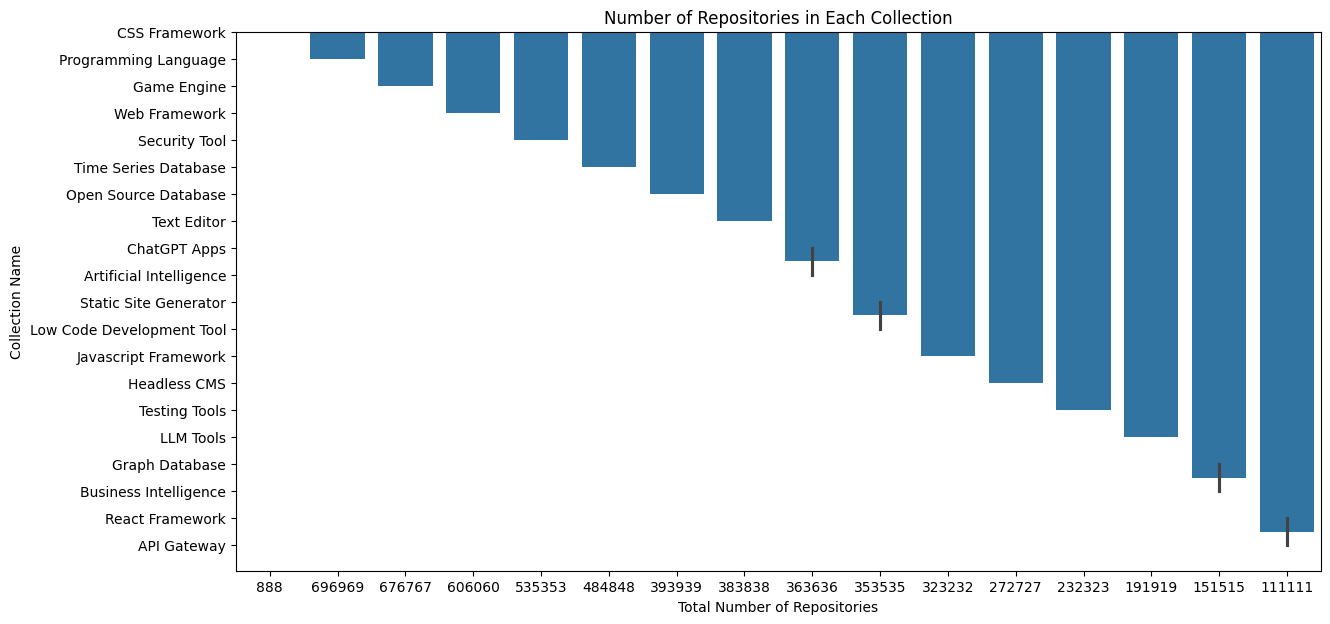

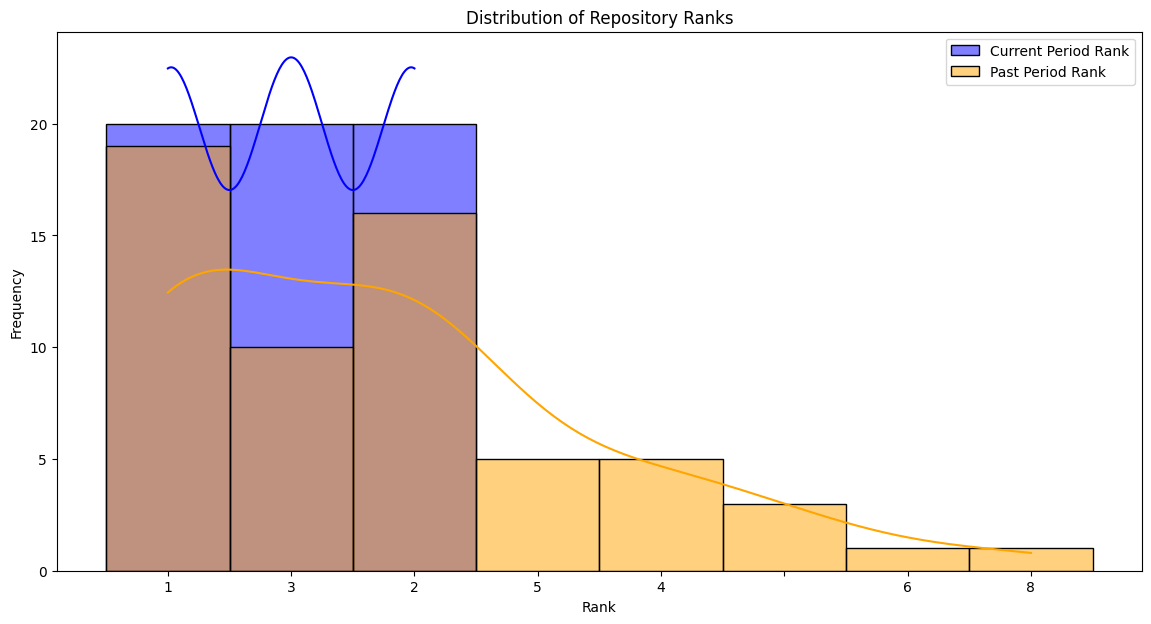

/tmp/ipykernel_5441/1816133568.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='repo_rank_changes', y='repo_name', data=top_rank_changes, palette='viridis')


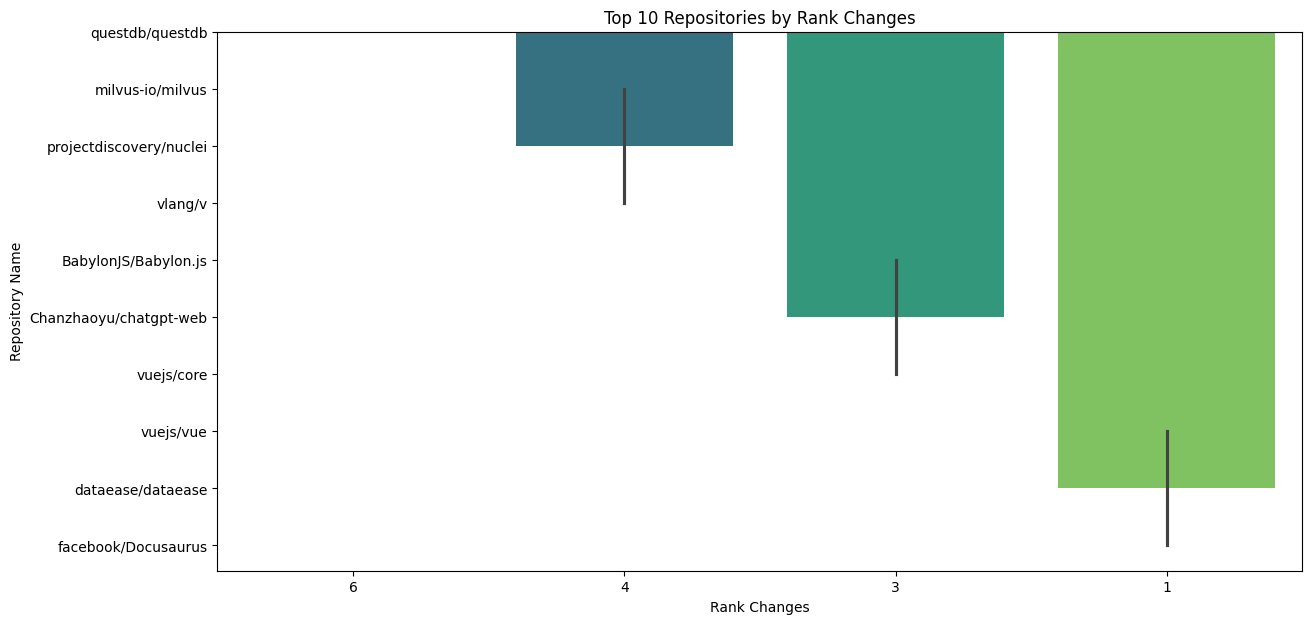

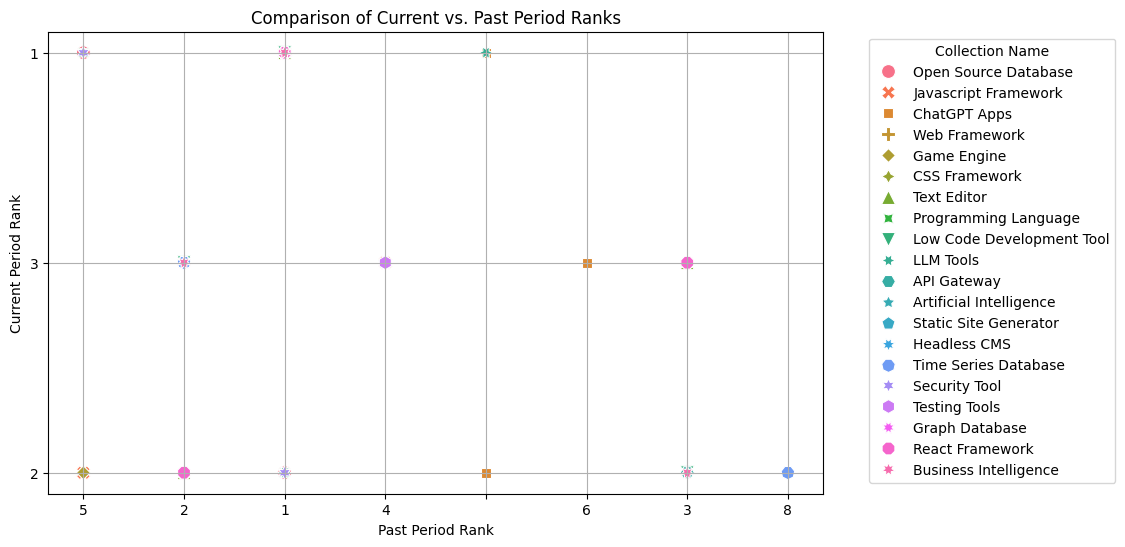

In [27]:
# Visualization 1: Bar Plot of Collections by Number of Repos
plt.figure(figsize=(14, 7))
collections_by_repos = df.groupby('name')['repos'].sum().sort_values(ascending=False)
sns.barplot(x=collections_by_repos.values, y=collections_by_repos.index)
plt.title('Number of Repositories in Each Collection')
plt.xlabel('Total Number of Repositories')
plt.ylabel('Collection Name')
plt.show()

# Visualization 2: Histogram of Current and Past Period Ranks
plt.figure(figsize=(14, 7))
sns.histplot(df['repo_current_period_rank'], color='blue', label='Current Period Rank', kde=True)
sns.histplot(df['repo_past_period_rank'], color='orange', label='Past Period Rank', kde=True)
plt.title('Distribution of Repository Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualization 3: Bar Plot of Top Repositories by Rank Changes
plt.figure(figsize=(14, 7))
top_rank_changes = df[df['repo_rank_changes'] != 0].sort_values(by='repo_rank_changes', ascending=False).head(10)
sns.barplot(x='repo_rank_changes', y='repo_name', data=top_rank_changes, palette='viridis')
plt.title('Top 10 Repositories by Rank Changes')
plt.xlabel('Rank Changes')
plt.ylabel('Repository Name')
plt.show()

# Visualization 4: Scatter Plot of Current vs. Past Ranks
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='repo_past_period_rank', y='repo_current_period_rank', hue='name', style='name', s=100)
plt.title('Comparison of Current vs. Past Period Ranks')
plt.xlabel('Past Period Rank')
plt.ylabel('Current Period Rank')
plt.legend(title='Collection Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [30]:
# Issue creator 
df =  fetch_data_from_api("https://api.ossinsight.io/v1/repos/pingcap/tidb/issue_creators/")
df = perform_eda(df)



         id        login          name issues first_issue_opened_at
0   3427324   hawkingrei  Weizhen Wang    593   2021-05-28 09:41:34
1  18818196     tisonkun         tison    407   2021-02-20 02:02:25
2   1420062  tiancaiamao                  389   2016-07-01 13:40:58
3   4242506     zimulala          Lynn    360   2015-09-23 12:40:05
4  17380469  wjhuang2016       wjHuang    306   2019-03-12 13:44:15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     30 non-null     object
 1   login                  30 non-null     object
 2   name                   30 non-null     object
 3   issues                 30 non-null     object
 4   first_issue_opened_at  30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB
None
             id       login name issues first_issue_opened_at
count        30          3

/tmp/ipykernel_5441/2959188873.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='issues', y='login', data=top_contributors, palette='viridis')


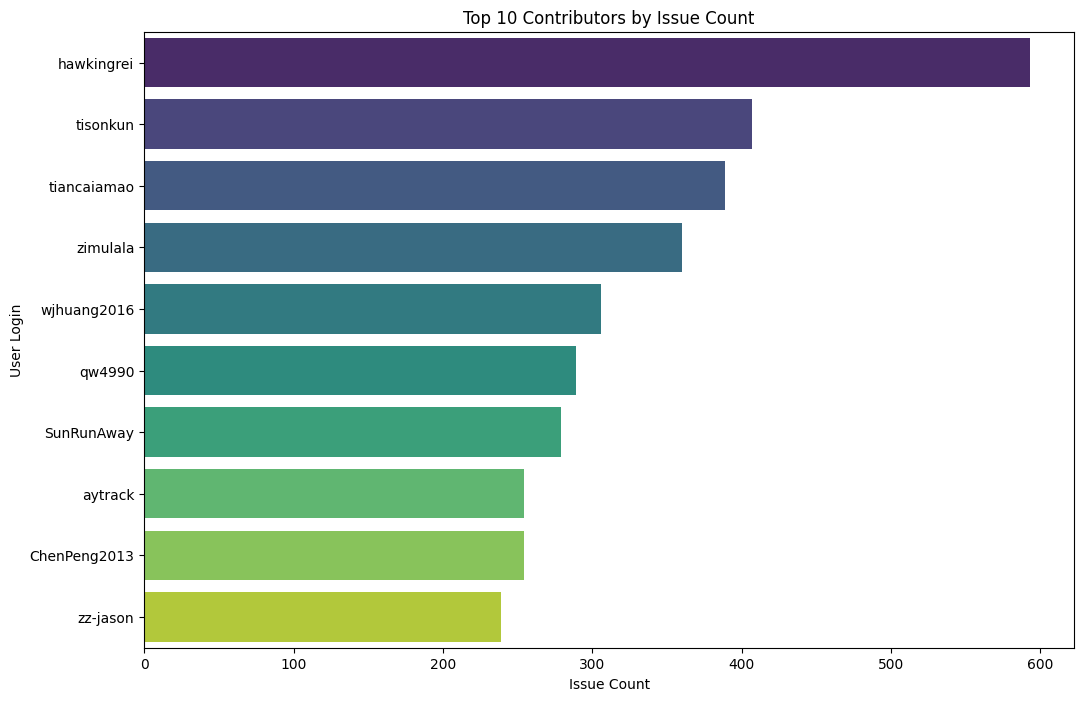

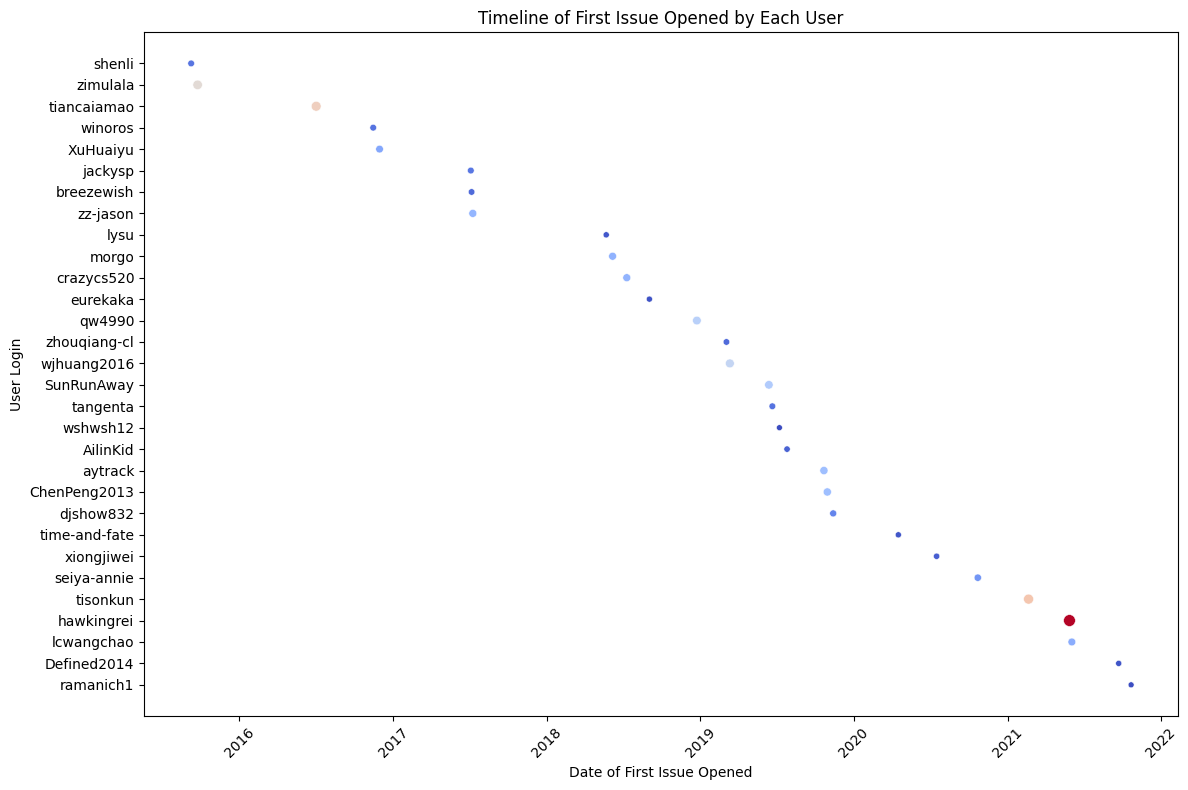

In [33]:

# Convert 'issues' to integer and 'first_issue_opened_at' to datetime
df['issues'] = df['issues'].astype(int)
df['first_issue_opened_at'] = pd.to_datetime(df['first_issue_opened_at'])

# Visualization 1: Bar Plot of Top Contributors by Issue Count
plt.figure(figsize=(12, 8))
top_contributors = df.nlargest(10, 'issues')
sns.barplot(x='issues', y='login', data=top_contributors, palette='viridis')
plt.title('Top 10 Contributors by Issue Count')
plt.xlabel('Issue Count')
plt.ylabel('User Login')
plt.show()

# Visualization 2: Timeline of First Issue Opened Date for Each User
plt.figure(figsize=(12, 8))
df = df.sort_values('first_issue_opened_at')
sns.scatterplot(data=df, x='first_issue_opened_at', y='login', size='issues', hue='issues', palette='coolwarm', legend=False)
plt.title('Timeline of First Issue Opened by Each User')
plt.xlabel('Date of First Issue Opened')
plt.ylabel('User Login')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
# Countries/Regions of Issue Creators
df = fetch_data_from_api("https://api.ossinsight.io/v1/repos/pingcap/tidb/issue_creators/countries/")
df = perform_eda(df)




  country_code issue_creators percentage
0           CN            455     0.7712
1           US             39     0.0661
2           IN             15     0.0254
3           CA              8     0.0136
4           SG              7     0.0119
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country_code    32 non-null     object
 1   issue_creators  32 non-null     object
 2   percentage      32 non-null     object
dtypes: object(3)
memory usage: 896.0+ bytes
None
       country_code issue_creators percentage
count            32             32         32
unique           32             10         10
top              CN              1     0.0017
freq              1             12         12


/tmp/ipykernel_5441/2510227193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country_code', y='issue_creators', data=df, palette='viridis')


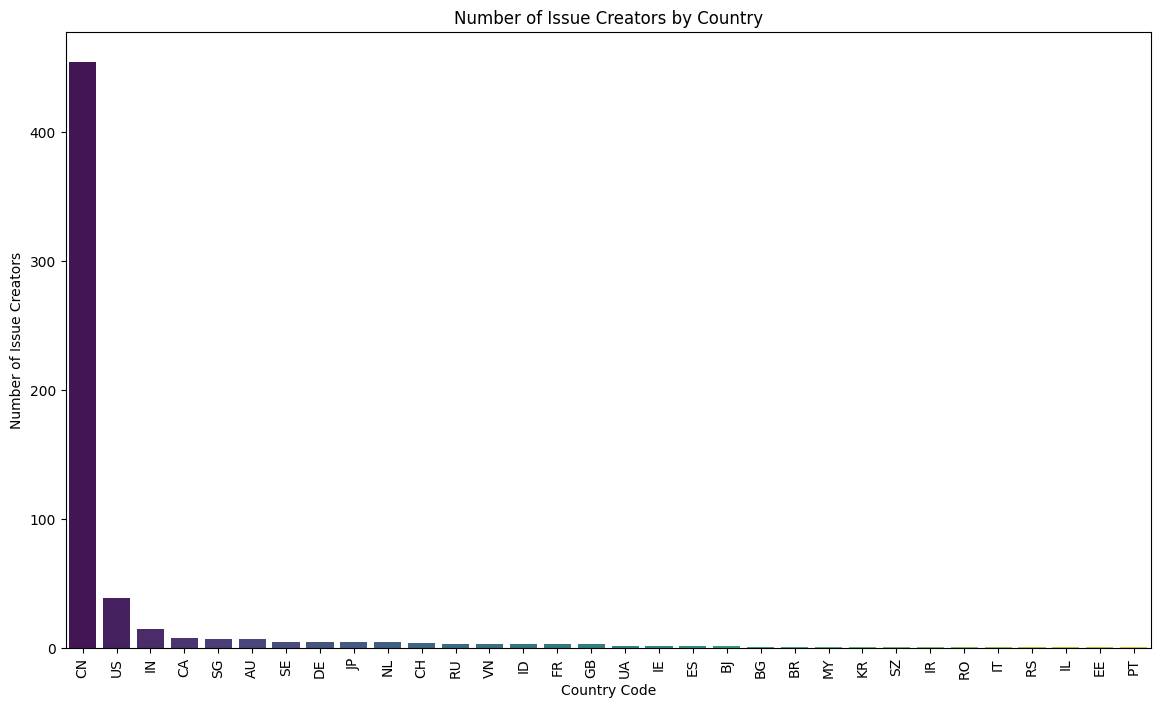

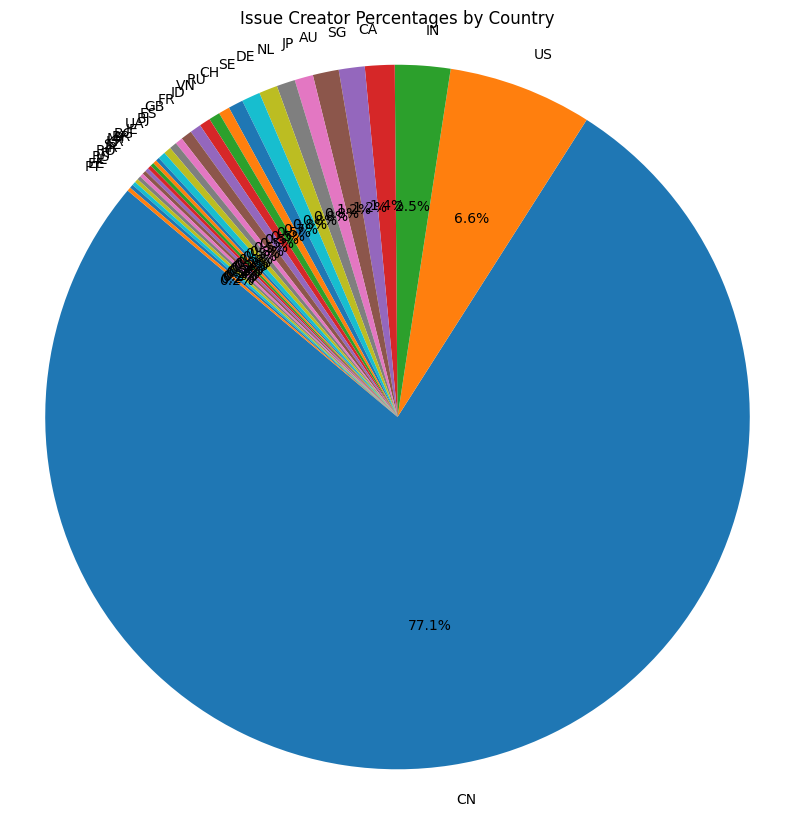

In [35]:
# Convert 'issue_creators' to integer and 'percentage' to float
df['issue_creators'] = df['issue_creators'].astype(int)
df['percentage'] = df['percentage'].astype(float)

# Visualization 1: Bar Plot of Issue Creators by Country
plt.figure(figsize=(14, 8))
sns.barplot(x='country_code', y='issue_creators', data=df, palette='viridis')
plt.title('Number of Issue Creators by Country')
plt.xlabel('Country Code')
plt.ylabel('Number of Issue Creators')
plt.xticks(rotation=90)
plt.show()

# Visualization 2: Pie Chart of Issue Creator Percentages by Country
plt.figure(figsize=(10, 10))
df_sorted = df.sort_values('percentage', ascending=False)
plt.pie(df_sorted['percentage'], labels=df_sorted['country_code'], autopct='%1.1f%%', startangle=140)
plt.title('Issue Creator Percentages by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [36]:
# Organizations of Star Gazers
df = fetch_data_from_api("https://api.ossinsight.io/v1/repos/pingcap/tidb/issue_creators/organizations/")
df = perform_eda(df)


  issue_creators   org_name percentage
0            116    pingcap     0.2755
1             10    tencent     0.0238
2              7  bytedance     0.0166
3              7    alibaba     0.0166
4              3   linkedin     0.0071
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   issue_creators  263 non-null    object
 1   org_name        263 non-null    object
 2   percentage      263 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB
None
       issue_creators org_name percentage
count             263      263        263
unique              6      263          6
top                 1  pingcap     0.0024
freq              239        1        239
